In [29]:
from bs4 import BeautifulSoup, Tag
import numpy as np
import pandas as pd
import torch
import constants
import secrets
import re
import requests
import pprint
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

In [30]:
def get_jsonparsed_data(url):

    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

In [31]:
alltickers = (f"{constants.FMP_SYMBOLS_URL}?apikey={secrets.FMP_API_KEY}")
tickers = get_jsonparsed_data(alltickers)
pprint.pprint(tickers[0])

C:\Users\trexx\AppData\Local\Temp/ipykernel_5676/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


{'exchange': 'NASDAQ Global Market',
 'exchangeShortName': 'NASDAQ',
 'name': 'Kentucky First Federal Bancorp',
 'price': 6.525,
 'symbol': 'KFFB',
 'type': 'stock'}


In [32]:
rowOfTickers = {}
for ticker in tickers:
    rowOfTickers[ticker["symbol"]] = 0.0
pprint.pprint(rowOfTickers)

{'000001.SZ': 0.0,
 '000002.SZ': 0.0,
 '000004.SZ': 0.0,
 '000005.SZ': 0.0,
 '000006.SZ': 0.0,
 '000007.SZ': 0.0,
 '000008.SZ': 0.0,
 '000009.SZ': 0.0,
 '000010.SZ': 0.0,
 '000011.SZ': 0.0,
 '000012.SZ': 0.0,
 '000014.SZ': 0.0,
 '000016.SZ': 0.0,
 '000017.SZ': 0.0,
 '000019.SZ': 0.0,
 '000020.KS': 0.0,
 '000020.SZ': 0.0,
 '000021.SZ': 0.0,
 '000023.SZ': 0.0,
 '000025.SZ': 0.0,
 '000026.SZ': 0.0,
 '000027.SZ': 0.0,
 '000028.SZ': 0.0,
 '000029.SZ': 0.0,
 '000030.SZ': 0.0,
 '000031.SZ': 0.0,
 '000032.SZ': 0.0,
 '000034.SZ': 0.0,
 '000035.SZ': 0.0,
 '000036.SZ': 0.0,
 '000037.SZ': 0.0,
 '000038.SZ': 0.0,
 '000039.SZ': 0.0,
 '000040.KS': 0.0,
 '000040.SZ': 0.0,
 '000042.SZ': 0.0,
 '000045.SZ': 0.0,
 '000046.SZ': 0.0,
 '000048.SZ': 0.0,
 '000049.SZ': 0.0,
 '000050.KS': 0.0,
 '000050.SZ': 0.0,
 '000055.SZ': 0.0,
 '000056.SZ': 0.0,
 '000058.SZ': 0.0,
 '000059.SZ': 0.0,
 '000060.SZ': 0.0,
 '000061.SZ': 0.0,
 '000062.SZ': 0.0,
 '000063.SZ': 0.0,
 '000065.SZ': 0.0,
 '000066.SZ': 0.0,
 '000068.SZ'

In [33]:
print("MSFT" in rowOfTickers.keys())

True


In [34]:
url_sentiment = (f"https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page=0&apikey=b0446da02c01a0943a01730dc2343e34")
sentiment_news = get_jsonparsed_data(url_sentiment)
print(f"{len(sentiment_news)} articles retrieved")
pprint.pprint(sentiment_news[0])


C:\Users\trexx\AppData\Local\Temp/ipykernel_5676/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


100 articles retrieved
{'image': 'https://ml.globenewswire.com/Resource/Download/3dd23e74-2be6-4796-9d10-e40cb0853153',
 'publishedDate': '2023-06-22T22:03:00.000Z',
 'sentiment': 'Positive',
 'sentimentScore': 0.9763,
 'site': 'globenewswire',
 'symbol': 'FVI',
 'text': 'VANCOUVER, British Columbia, June 22, 2023 (GLOBE NEWSWIRE) -- '
         'Fortuna Silver Mines, Inc. (NYSE: FSM | TSX: FVI) hereby announces '
         'the voting results at the Company’s annual general meeting held on '
         'June 22, 2023...',
 'title': 'Fortuna reports results of Annual General Meeting',
 'url': 'https://www.globenewswire.com/news-release/2023/06/22/2693366/0/en/Fortuna-reports-results-of-Annual-General-Meeting.html'}


In [35]:
df = pd.read_csv(constants.DATA_PATH)
print(df.head())

         date      AAPL
0  2023-05-23  0.821750
1  2023-05-24  0.997400
2  2023-05-25  0.959625
3  2023-05-27  0.989100
4  2023-05-28  0.995900


In [36]:
from datetime import datetime
ticker = "AAPL"
for i in range(100):
    page = str(i)
    url = (f"https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page={page}&apikey=b0446da02c01a0943a01730dc2343e34")
    sentiment_news = get_jsonparsed_data(url)


    for news in sentiment_news:
        if news["symbol"] == ticker:
            dateOnly = news["publishedDate"].split("T")[0]
            row = {"date":str(dateOnly), ticker:news["sentimentScore"]}
            df = df.append(row, ignore_index=True)

collapsed_df = df.groupby('date')['AAPL'].mean().reset_index()
print(df)
collapsed_df.to_csv(constants.DATA_PATH, index=False)
print("done")

C:\Users\trexx\AppData\Local\Temp/ipykernel_5676/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


           date      AAPL
0    2023-05-23  0.821750
1    2023-05-24  0.997400
2    2023-05-25  0.959625
3    2023-05-27  0.989100
4    2023-05-28  0.995900
..          ...       ...
112  2023-05-25  0.999200
113  2023-05-25  0.994900
114  2023-05-24  0.997400
115  2023-05-23  0.883400
116  2023-05-23  0.760100

[117 rows x 2 columns]
done


In [37]:
print(collapsed_df)

          date      AAPL
0   2023-05-23  0.821750
1   2023-05-24  0.997400
2   2023-05-25  0.959625
3   2023-05-27  0.989100
4   2023-05-28  0.995900
5   2023-05-29  0.680800
6   2023-05-30  0.997400
7   2023-05-31  0.998767
8   2023-06-01  0.984525
9   2023-06-02  0.977900
10  2023-06-03  0.892400
11  2023-06-04  0.998400
12  2023-06-05  0.982313
13  2023-06-06  0.388678
14  2023-06-07  0.928470
15  2023-06-08  0.998600
16  2023-06-09  0.996100
17  2023-06-10  0.998500
18  2023-06-11  0.945500
19  2023-06-12  0.999350
20  2023-06-13  0.995680
21  2023-06-14  0.996480
22  2023-06-15  0.999150
23  2023-06-16  0.998000
24  2023-06-18  0.992000
25  2023-06-19  0.990260
26  2023-06-20  0.999333
27  2023-06-21 -0.666200
28  2023-06-22  0.851619


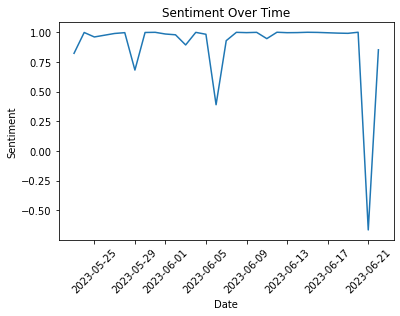

In [38]:

import matplotlib.pyplot as plt

# Assuming 'constants.DATA_PATH' contains the path to your CSV file
df = pd.read_csv(constants.DATA_PATH)

# Assuming 'date' and 'AAPL' are the column names in your DataFrame
if 'date' in df.columns and 'AAPL' in df.columns:
    # Convert the 'date' column to datetime type
    df['date'] = pd.to_datetime(df['date'])

    # Sort the DataFrame by the 'date' column
    df = df.sort_values('date')

    # Plot the line plot
    plt.plot(df['date'], df['AAPL'])

    # Set the labels for x and y axes
    plt.xlabel('Date')
    plt.ylabel('Sentiment')

    # Set the title of the plot
    plt.title('Sentiment Over Time')

    # Rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()